In [ ]:
import spacy
import pandas as pd
import multiprocessing
import matplotlib.pyplot as plt


In [53]:
nlp = spacy.load("en_core_web_sm") 
df = pd.read_csv("/Users/thorkildkappel/Desktop/4. sem/Soc cult-paper/archive/train_v4_drcat_01.csv")

In [62]:
df.head(5)

,Unnamed: 0,text,label,prompt_name,source,RDizzl3_seven,model,nlp,pos
0,0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False,human,Phones\n\nModern humans today are always on th...,
1,1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False,human,This essay will explain if drivers should or s...,
2,2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False,human,Driving while the use of cellular devices\n\nT...,
3,3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False,human,Phones & Driving\n\nDrivers should not be able...,
4,4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False,human,Cell Phone Operation While Driving\n\nThe abil...,


In [28]:

df["nlp"] = ""

counter = 0

for i in range(len(df["text"])):
    df["nlp"][i] = nlp(df["text"][i])
    counter += 1
    print(round(counter/len(df["text"]), 4), end='\r')



    

/var/folders/5z/ksmd9z810hv7hd63k2mmtgzr0000gn/T/ipykernel_56199/1217382354.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["nlp"][i] = nlp(df["text"][i])


KeyboardInterrupt: 

In [64]:
# counter = 0
# for i in df["pos"]:
#     for token in i:
#         if counter == 20:
#             break
#         counter += 1
#         print(token.pos_)


# df.rename(columns = {'pos':'nlp'}, inplace = True)

df.head(5)


,Unnamed: 0,text,label,prompt_name,source,RDizzl3_seven,model,nlp,pos
0,0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False,human,Phones\n\nModern humans today are always on th...,"['NOUN', 'SPACE', 'PROPN', 'NOUN', 'NOUN', 'AU..."
1,1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False,human,This essay will explain if drivers should or s...,"['DET', 'NOUN', 'AUX', 'VERB', 'SCONJ', 'NOUN'..."
2,2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False,human,Driving while the use of cellular devices\n\nT...,"['VERB', 'SCONJ', 'DET', 'NOUN', 'ADP', 'ADJ',..."
3,3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False,human,Phones & Driving\n\nDrivers should not be able...,"['PROPN', 'CCONJ', 'PROPN', 'SPACE', 'NOUN', '..."
4,4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False,human,Cell Phone Operation While Driving\n\nThe abil...,"['PROPN', 'PROPN', 'PROPN', 'SCONJ', 'VERB', '..."


In [66]:

#df["pos"] = ""

counter = 0
for i in range(len(df["nlp"])):
    pos_list = []
    for token in df["nlp"][i]:
        pos_list.append(token.pos_)
    df["pos"][i] = pos_list
    counter +=1
    print(round(counter/len(df["text"]), 4), end='\r')




AttributeError: 'str' object has no attribute 'pos_'

In [88]:
df.to_csv('/Users/thorkildkappel/Desktop/4. sem/Soc cult-paper/archive/train_v4_drcat_02.csv')

In [37]:
df = pd.read_csv("/Users/thorkildkappel/Desktop/4. sem/Soc cult-paper/archive/train_v4_drcat_02.csv")
df.head(5)

,Unnamed: 0,text,label,prompt_name,source,RDizzl3_seven,model,nlp,pos
0,0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False,human,Phones\n\nModern humans today are always on th...,"['NOUN', 'SPACE', 'PROPN', 'NOUN', 'NOUN', 'AU..."
1,1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False,human,This essay will explain if drivers should or s...,"['DET', 'NOUN', 'AUX', 'VERB', 'SCONJ', 'NOUN'..."
2,2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False,human,Driving while the use of cellular devices\n\nT...,"['VERB', 'SCONJ', 'DET', 'NOUN', 'ADP', 'ADJ',..."
3,3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False,human,Phones & Driving\n\nDrivers should not be able...,"['PROPN', 'CCONJ', 'PROPN', 'SPACE', 'NOUN', '..."
4,4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False,human,Cell Phone Operation While Driving\n\nThe abil...,"['PROPN', 'PROPN', 'PROPN', 'SCONJ', 'VERB', '..."


In [90]:
#making dictionaries with the counts of each type of word.

human_count = {}
LLM_count = {}


for i in range(len(df["pos"])):
    if df["label"][i] == 0:
        for pos in df["pos"][i]:
            if pos in human_count.keys():
                human_count[pos] += 1
            else:
                human_count[pos] = 0
    elif df["label"][i] == 1:
        for pos in df["pos"][i]:
            if pos in LLM_count.keys():
                LLM_count[pos] += 1
            else:
                LLM_count[pos] = 0


In [91]:
df["pos"][i]

for i in range(len(df["pos"])):
    for pos in df["pos"][i]:
        print(pos)
    break
        
        
        

NOUN
SPACE
PROPN
NOUN
NOUN
AUX
ADV
ADP
PRON
NOUN
PUNCT
PRON
AUX
ADV
ADP
PRON
NOUN
ADJ
ADP
NUM
NOUN
DET
NOUN
DET
NOUN
PUNCT
PRON
AUX
AUX
NOUN
ADV
CCONJ
ADV
CCONJ
ADV
VERB
NOUN
NOUN
ADP
ADJ
NOUN
PUNCT
PRON
ADV
VERB
PRON
SCONJ
VERB
PUNCT
PRON
AUX
DET
ADV
ADJ
NOUN
SCONJ
NOUN
VERB
SCONJ
PRON
VERB
ADP
DET
NOUN
PUNCT
DET
ADJ
NOUN
ADP
DET
PROPN
PROPN
NOUN
NOUN
ADP
NOUN
NOUN
ADV
SCONJ
ADP
PRON
PUNCT
SPACE
SCONJ
NOUN
VERB
NOUN
PUNCT
PRON
VERB
ADP
ADJ
NOUN
SCONJ
PRON
VERB
X
ADP
PROPN
PROPN
PROPN
CCONJ
PROPN
PUNCT
ADV
INTJ
SCONJ
DET
NOUN
VERB
ADV
CCONJ
PRON
VERB
PART
AUX
ADP
NOUN
PRON
AUX
ADV
AUX
ADP
NOUN
ADP
VERB
NOUN
CCONJ
NOUN
NOUN
PUNCT
NOUN
ADV
VERB
ADJ
NOUN
SCONJ
PART
VERB
ADP
DET
NOUN
PUNCT
NOUN
AUX
VERB
ADP
ADP
PRON
NOUN
PUNCT
SPACE
NOUN
AUX
NUM
ADP
DET
NOUN
SCONJ
PART
VERB
ADP
PUNCT
NOUN
ADV
VERB
ADP
PRON
NOUN
SCONJ
VERB
PRON
PUNCT
PRON
AUX
VERB
ADJ
NOUN
PUNCT
PRON
AUX
SCONJ
PRON
VERB
DET
NOUN
PRON
AUX
VERB
DET
NOUN
SCONJ
VERB
PUNCT
PRON
AUX
DET
ADV
ADJ
NOUN
PART
VERB
PUNCT
DET
NOUN
ADV
V

In [92]:
print(human_count)
print(LLM_count)

{'NOUN': 2391694, 'SPACE': 153102, 'PROPN': 272297, 'AUX': 1003358, 'ADV': 579510, 'ADP': 1147775, 'PRON': 1246135, 'PUNCT': 1088560, 'ADJ': 798371, 'NUM': 103326, 'DET': 1031967, 'CCONJ': 410272, 'VERB': 1690879, 'SCONJ': 420028, 'X': 4198, 'INTJ': 11819, 'PART': 495638, 'SYM': 4997}
{'SPACE': 268225, 'ADP': 1890979, 'ADJ': 1611775, 'NOUN': 4196173, 'PUNCT': 2035145, 'AUX': 1166950, 'VERB': 2295469, 'DET': 1648119, 'PRON': 1274605, 'CCONJ': 696205, 'ADV': 698887, 'SCONJ': 439630, 'NUM': 100678, 'PART': 578082, 'PROPN': 567698, 'X': 13421, 'INTJ': 19069, 'SYM': 2441}


In [93]:
# Create DataFrames from dictionaries
df1 = pd.DataFrame(human_count.items(), columns=['POS', 'Human'])
df2 = pd.DataFrame(LLM_count.items(), columns=['POS', 'LLM'])

merged_df = pd.merge(df1, df2, on='POS', how='outer')

print(merged_df)

      POS    Human      LLM
0    NOUN  2391694  4196173
1   SPACE   153102   268225
2   PROPN   272297   567698
3     AUX  1003358  1166950
4     ADV   579510   698887
5     ADP  1147775  1890979
6    PRON  1246135  1274605
7   PUNCT  1088560  2035145
8     ADJ   798371  1611775
9     NUM   103326   100678
10    DET  1031967  1648119
11  CCONJ   410272   696205
12   VERB  1690879  2295469
13  SCONJ   420028   439630
14      X     4198    13421
15   INTJ    11819    19069
16   PART   495638   578082
17    SYM     4997     2441


In [94]:
merged_df["Human_percentage"] = ""
merged_df["LLM_percentage"] = ""

for i in range(len(merged_df)):
    merged_df["Human_percentage"][i] = round(merged_df["Human"][i]/sum(merged_df["Human"])*100, 2)

for i in range(len(merged_df)):
    merged_df["LLM_percentage"][i] = round(merged_df["LLM"][i]/sum(merged_df["LLM"])*100, 2)

merged_df

/var/folders/5z/ksmd9z810hv7hd63k2mmtgzr0000gn/T/ipykernel_56199/1414561292.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df["Human_percentage"][i] = round(merged_df["Human"][i]/sum(merged_df["Human"])*100, 2)
/var/folders/5z/ksmd9z810hv7hd63k2mmtgzr0000gn/T/ipykernel_56199/1414561292.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df["LLM_percentage"][i] = round(merged_df["LLM"][i]/sum(merged_df["LLM"])*100, 2)


,POS,Human,LLM,Human_percentage,LLM_percentage
0,NOUN,2391694,4196173,18.61,21.51
1,SPACE,153102,268225,1.19,1.38
2,PROPN,272297,567698,2.12,2.91
3,AUX,1003358,1166950,7.81,5.98
4,ADV,579510,698887,4.51,3.58
5,ADP,1147775,1890979,8.93,9.7
6,PRON,1246135,1274605,9.69,6.54
7,PUNCT,1088560,2035145,8.47,10.43
8,ADJ,798371,1611775,6.21,8.26
9,NUM,103326,100678,0.8,0.52


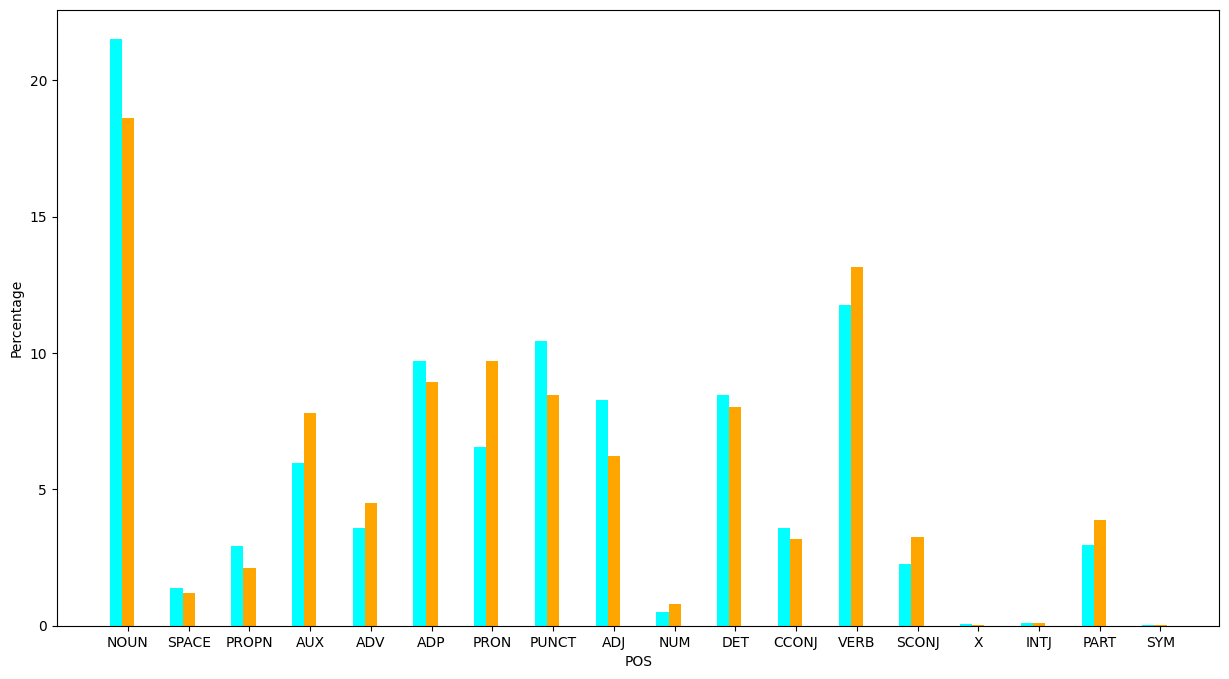

In [87]:



plt.rcParams["figure.figsize"] = (15, 8)

x = np.arange(18)

width = 0.2

plt.bar(x-0.2, merged_df["LLM_percentage"], width, color='cyan') 
plt.bar(x, merged_df["Human_percentage"], width, color='orange') 
plt.xticks(x, merged_df["POS"]) 
plt.xlabel("POS") 
plt.ylabel("Percentage")
plt.show()

In [83]:
import pandas as pd
from ast import literal_eval
df = pd.read_csv("/Users/thorkildkappel/Desktop/4. sem/Soc cult-paper/archive/train_v4_drcat_02.csv")


# Convert the string representations of lists to actual lists
df['pos'] = df['pos'].apply(literal_eval)
# df.head(5)
# df['pos'][1]

In [96]:
df["pos_count"] = ""

for i in range(len(df)):
    df["pos_count"][i] = dict.fromkeys(merged_df["POS"], 0)


for i in range(len(df)):
    for pos in df["pos"]:




/var/folders/5z/ksmd9z810hv7hd63k2mmtgzr0000gn/T/ipykernel_56199/3431461957.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["pos_count"][i] = dict.fromkeys(merged_df["POS"], 0)


In [98]:
df.head(5)

,Unnamed: 0,text,label,prompt_name,source,RDizzl3_seven,model,nlp,pos,pos_count
0,0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False,human,Phones\n\nModern humans today are always on th...,"[NOUN, SPACE, PROPN, NOUN, NOUN, AUX, ADV, ADP...","{'NOUN': 0, 'SPACE': 0, 'PROPN': 0, 'AUX': 0, ..."
1,1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False,human,This essay will explain if drivers should or s...,"[DET, NOUN, AUX, VERB, SCONJ, NOUN, AUX, CCONJ...","{'NOUN': 0, 'SPACE': 0, 'PROPN': 0, 'AUX': 0, ..."
2,2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False,human,Driving while the use of cellular devices\n\nT...,"[VERB, SCONJ, DET, NOUN, ADP, ADJ, NOUN, SPACE...","{'NOUN': 0, 'SPACE': 0, 'PROPN': 0, 'AUX': 0, ..."
3,3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False,human,Phones & Driving\n\nDrivers should not be able...,"[PROPN, CCONJ, PROPN, SPACE, NOUN, AUX, PART, ...","{'NOUN': 0, 'SPACE': 0, 'PROPN': 0, 'AUX': 0, ..."
4,4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False,human,Cell Phone Operation While Driving\n\nThe abil...,"[PROPN, PROPN, PROPN, SCONJ, VERB, SPACE, DET,...","{'NOUN': 0, 'SPACE': 0, 'PROPN': 0, 'AUX': 0, ..."


In [15]:
df = pd.read_csv("/Users/thorkildkappel/Desktop/4. sem/Soc cult-paper/archive/train_v4_drcat_03.csv") #accidently deleted code but now have the pos_counts in a dataframe

In [16]:
import ast
df['pos_percentage'] = df['pos_percentage'].apply(ast.literal_eval) #make sure it knows that pos_percentage is a dictionary

expanded_df = pd.concat([df.drop(['pos_percentage', "Unnamed: 0.1", "Unnamed: 0", "text","prompt_name", "source", "RDizzl3_seven", "model", "nlp", 	"pos",'pos_count'], axis=1), df['pos_percentage'].apply(pd.Series)], axis=1) # expand such that each pos has a column for itself

In [17]:
expanded_df.columns

Index(['label', 'NOUN', 'SPACE', 'PROPN', 'AUX', 'ADV', 'ADP', 'PRON', 'PUNCT',
       'ADJ', 'NUM', 'DET', 'CCONJ', 'VERB', 'SCONJ', 'X', 'INTJ', 'PART',
       'SYM'],
      dtype='object')

In [29]:
expanded_df.to_csv('/Users/thorkildkappel/Desktop/4. sem/Soc cult-paper/archive/POS_df.csv')

NameError: name 'merged_df' is not defined